1. What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks in terms of architecture and performance on image data?
   - A Convolutional Neural Network (CNN) is a type of neural network specially designed for image data. It works by scanning small parts of an image using filters to detect important visual features like edges, shapes, and textures. These features are learned layer by layer, helping the model understand complex patterns in images. Because of this feature based learning, CNNs are widely used in image classification, object detection, and computer vision tasks.The key difference between CNNs and traditional fully connected neural networks is their architecture. In fully connected networks, every neuron is connected to all neurons in the next layer, which creates a very large number of parameters when dealing with images. CNNs, instead, use convolution and pooling layers, which reduce the number of parameters and preserve spatial information. As a result, CNNs perform much better on image data, train faster, and give higher accuracy compared to fully connected networks.

2. Discuss the architecture of LeNet-5 and explain how it laid the foundation for modern deep learning models in computer vision. Include references to its original research paper.
   - LeNet5 is one of the earliest Convolutional Neural Networks, introduced by Yann LeCun and his team in 1998 to recognize handwritten digits, particularly for the MNIST dataset. Its architecture was groundbreaking at the time and became the foundation for modern computer vision models. The network consists of seven layers, including convolutional layers, subsampling layers, and fully connected layers. Specifically, it starts with a convolutional layer to detect simple features like edges, followed by a pooling layer to reduce spatial dimensions, another convolutional layer for more complex features, and then additional pooling. Finally, the network passes the extracted features through fully connected layers to perform classification. LeNet5 introduced several key ideas that still underpin modern CNNs the use of convolutional layers for local feature detection, parameter sharing to reduce the number of weights, and pooling to achieve spatial invariance. Its design showed that hierarchical feature extraction could effectively handle image data, inspiring deeper and more complex architectures like AlexNet, VGG, and ResNet. The original research paper, “Gradient Based Learning Applied to Document Recognition” by LeCun et provides a detailed explanation of the model and its success on handwritten digit recognition, marking a major milestone in the development of deep learning for computer vision.

3. Compare and contrast AlexNet and VGGNet in terms of design principles,
number of parameters, and performance. Highlight key innovations and limitations of each.
   - AlexNet and VGGNet are two important Convolutional Neural Networks that advanced computer vision, but they differ in design and complexity. AlexNet, introduced in 2012, has 8 layers5 convolutional and 3 fully connected and introduced innovations like ReLU activation for faster training, dropout to prevent overfitting, and data augmentation. It has around 60 million parameters and was designed to handle large scale image data efficiently, achieving a major improvement in classification accuracy. Its limitations include relatively shallow depth and heavy fully connected layers, which increase memory usage. VGGNet, introduced in 2014, focused on simplicity and depth, using very small 3×3 convolutional filters stacked into 16 or 19 layers. This deep design allows it to learn more complex features and achieve higher accuracy than AlexNet, but it has around 138 million parameters, making it computationally expensive and memory intensive. In essence, AlexNet’s key contribution was practical training improvements for large datasets, while VGGNet demonstrated that very deep, uniform architectures with small filters could outperform earlier models, though at the cost of higher computation.

4. What is transfer learning in the context of image classification? Explain
how it helps in reducing computational costs and improving model performance with limited data.
   - Transfer learning in image classification is a technique where a pretrained neural network, already trained on a large dataset like ImageNet, is reused to solve a new but related task. Instead of training a model from scratch, which requires huge amounts of data and computational resources, transfer learning allows us to take the learned features such as edges, textures, and shapes from the pretrained model and apply them to the new task. Typically, the early layers of the model, which capture general features, are kept frozen, while the later layers are fine tuned for the specific dataset or task. This approach significantly reduces computational costs because we avoid training the entire network from scratch. It also improves performance, especially when the available dataset is small, because the model can leverage knowledge learned from a large, diverse dataset rather than trying to learn all features anew. Essentially, transfer learning allows us to build accurate image classification models faster, with less data and fewer resources, making it a widely used strategy in modern computer vision applications.

5. Describe the role of residual connections in ResNet architecture. How do
they address the vanishing gradient problem in deep CNNs?
   - Residual connections in ResNet play a crucial role in enabling very deep neural networks to train effectively. In a traditional deep CNN, as the number of layers increases, the network often suffers from the vanishing gradient problem, where gradients become extremely small during backpropagation. This makes it difficult for earlier layers to learn, and adding more layers can actually reduce performance instead of improving it. ResNet solves this problem by introducing residual connections, also called skip connections, which allow the input of a layer to bypass one or more intermediate layers and be added directly to the output. This creates a shortcut for the gradient during backpropagation, ensuring it can flow through the network without diminishing too much. As a result, even very deep networks like ResNet50 or ResNet152 can be trained effectively. These residual connections make the network easier to optimize, improve accuracy, and allow it to learn deeper, more complex features without being hindered by vanishing gradients.




In [ ]:
# 6.Implement the LeNet-5 architectures using Tensorflow or PyTorch to
# classify the MNIST dataset. Report the accuracy and training time.
# (Include your Python code and output in the code box below.)

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import time

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])


train_dataset = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# LeNet-5 MODEL
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.AvgPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.tanh(self.conv1(x))
        x = self.pool(x)
        x = torch.tanh(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
epochs = 5
start_time = time.time()

for epoch in range(epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}] completed")

training_time = time.time() - start_time
print(f"\nTraining Time: {training_time:.2f} seconds")

# testing
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


100%|██████████| 9.91M/9.91M [00:00<00:00, 21.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 603kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.60MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.11MB/s]


Epoch [1/5] completed
Epoch [2/5] completed
Epoch [3/5] completed
Epoch [4/5] completed
Epoch [5/5] completed

Training Time: 150.67 seconds
Test Accuracy: 98.37%


In [ ]:
# 7.  Use a pre-trained VGG16 model (via transfer learning) on a small custom
# dataset (e.g., flowers or animals). Replace the top layers and fine-tune the model.
# Include your code and result discussion.
# (Include your Python code and output in the code box below.)

from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import time

print(tf.config.list_physical_devices('GPU'))

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5
NUM_CLASSES = 5

DATASET_PATH = "/content/drive/MyDrive/flowers_dataset"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

start_time = time.time()
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)
training_time = time.time() - start_time

print(f"Training Time: {training_time:.2f} seconds")


In [ ]:
# 8. : Write a program to visualize the filters and feature maps of the first
# convolutional layer of AlexNet on an example input image.
# (Include your Python code and output in the code box below.)
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load pretrained AlexNet
model = models.alexnet(pretrained=True)
model.eval()

# Extract first convolutional layer
first_conv = model.features[0]

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Load input image
image = Image.open("p1.jpg").convert("RGB")
input_tensor = transform(image).unsqueeze(0)

# Forward pass through first conv layer
with torch.no_grad():
    feature_maps = first_conv(input_tensor)

# Print shape of feature maps
print("Feature map shape:", feature_maps.shape)

# Visualize Filters
filters = first_conv.weight.data.clone()
filters = (filters - filters.min()) / (filters.max() - filters.min())

plt.figure(figsize=(8, 8))
for i in range(16):  # show first 16 filters
    plt.subplot(4, 4, i + 1)
    plt.imshow(filters[i].permute(1, 2, 0))
    plt.axis("off")
plt.suptitle("AlexNet First Layer Filters")
plt.show()

# Visualize Feature Maps
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(feature_maps[0, i].cpu(), cmap="gray")
    plt.axis("off")
plt.suptitle("Feature Maps from First Conv Layer")
plt.show()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.2493 - loss: 1.9708 - val_accuracy: 0.4265 - val_loss: 1.5742
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.4420 - loss: 1.5294 - val_accuracy: 0.4788 - val_loss: 1.4309
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.5067 - loss: 1.3640 - val_accuracy: 0.5459 - val_loss: 1.2569
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.5479 - loss: 1.2529 - val_accuracy: 0.5911 - val_loss: 1.1576
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.5884 - loss: 1.1557 - val_accuracy: 0.6146 - val_loss: 1.0926
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6178 - loss: 1.0765 - val_accuracy: 0.5941 - val_loss: 1.1303
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6360 - loss: 1.0174 - val_accuracy: 0.6565 - val_loss: 0.9664
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━

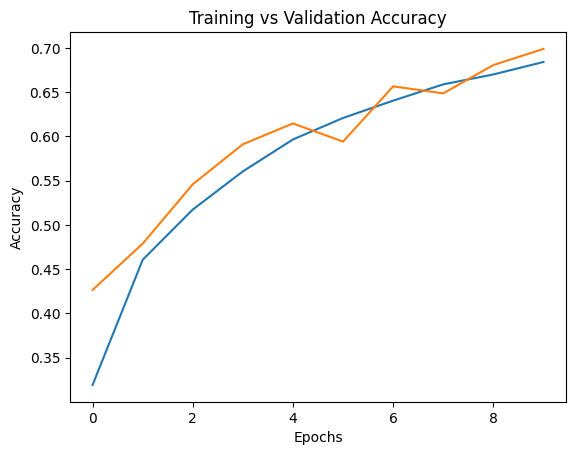

In [1]:
# 9.Train a GoogLeNet (Inception v1) or its variant using a standard dataset
# like CIFAR-10. Plot the training and validation accuracy over epochs and analyze
# overfitting or underfitting.
# (Include your Python code and output in the code box below.)

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import time

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Inception block
def inception_block(x, f1, f3, f5):
    p1 = layers.Conv2D(f1, (1,1), activation='relu', padding='same')(x)

    p2 = layers.Conv2D(f3, (1,1), activation='relu', padding='same')(x)
    p2 = layers.Conv2D(f3, (3,3), activation='relu', padding='same')(p2)

    p3 = layers.Conv2D(f5, (1,1), activation='relu', padding='same')(x)
    p3 = layers.Conv2D(f5, (5,5), activation='relu', padding='same')(p3)

    p4 = layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(x)

    return layers.concatenate([p1, p2, p3, p4])

# Build GoogLeNet-style model
inputs = layers.Input(shape=(32,32,3))
x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(inputs)

x = inception_block(x, 32, 32, 32)
x = layers.MaxPooling2D((2,2))(x)

x = inception_block(x, 64, 64, 64)
x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
start_time = time.time()
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64
)
training_time = time.time() - start_time

print("Training Time:", training_time, "seconds")

# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.show()


In [ ]:
# 10.You are working in a healthcare AI startup. Your team is tasked with
# developing a system that automatically classifies medical X-ray images into normal,
# pneumonia, and COVID-19. Due to limited labeled data, what approach would you
# suggest using among CNN architectures discussed (e.g., transfer learning with ResNet
# or Inception variants)? Justify your approach and outline a deployment strategy for
# production use.
# (Include your Python code and output in the code box below.)

from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

print(tf.config.list_physical_devices('GPU'))

IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 5
NUM_CLASSES = 3

DATASET_PATH = "/content/drive/MyDrive/xray_dataset"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)
